# Board-Interlocking And Corporate Performance on Company Performance

Name: Bingfeng Hu
CID: 01137798 
Date: 14/06/24


Data - start with the basic data structure see if that is fine for the whole story, and edit the structure here.

Text resources use - write up workflow and graph building workflow, and grpah building here



In [1]:
import pandas as pd # remove unncessary code structures here to show details
import numpy as np
import networkx as nx
pd.set_option('display.max_columns', None)

import graph_analysis as ga
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

### 1. Introduction and Context

Describe meaningful structure and what to do here 

Which datasets to work on

What the data structure is meaningful or not

Describe using a naive model. 



Given the potential large nature of graph, for companies and directors, 
looking at sub-industry - CIK details, doing sub sampling and looking at the two years

### 2. Graph structure analysis for graph interlocking

Graph structure here - add:
1. Graph interlocking graphs
2. Graph communitiies over time
3. SVD not meaningful - maybe too sparse and some other way is needed


1. Create the graphs by year
1. Create graph statistics by Director IDs 
1. Link Company IDs based on adjacency matrices
1. Take averages by year company id, and then link everything back

In [2]:
# set years
YEARS = [2022, 2023, 2024]

In [3]:
file_path = "raw_data/boardex_us_companies_full_data_2022_2024.csv"

filtered_data_df, boardex_data = ga.get_filtered_graph_data(file_path)
filtered_data_df.head()

,boardid,companyid,directorid,overlapyearstart,overlapyearend
0,401.0,2734400.0,601453.0,2020,NaN
1,401.0,3700766.0,601453.0,2023,NaN
2,401.0,61472.0,601453.0,2016,NaN
3,401.0,2055831.0,601453.0,2018,NaN
4,401.0,2065362.0,601453.0,2015,NaN


Link boardex data linking table to link with Compustat data for financial data.

In [4]:
boardex_gvkey_df = pd.read_csv("raw_data/USE_THIS_GVKEY_boardex_us_companies_keys.csv",
                               index_col= 0)

Describe the structure here

2. Create the graphs by year

Create a dictionary by year that's it, and get adjacency matrix

In [5]:
boardex_interlock_adj_dict = ga.create_adjacency_matrices_by_year(filtered_data_df, YEARS)

3. Calculate the graph statistics for each workflow

In [6]:
boardex_interlock_adj_dict.keys()

dict_keys([2022, 2023, 2024])

In [7]:
[x.shape for x in boardex_interlock_adj_dict.values()]

# 2024 has incomplete data

[(1694, 1694), (1059, 1059), (280, 280)]

4. Link the graph statistics back to the relevant companies

Then do averaging of these relevant statistics. If there are 0s that is fine also here.

In [8]:
graph_stat_df_final = ga.create_graph_statistics_df_by_year(boardex_interlock_adj_dict, YEARS)
graph_stat_df_final.head()

,directorid,local_clustering_coef,degree_centrality,betweenness_centrality,graph_density,year
0,1766630.0,1.0,0.013585,0.0,0.003216,2022
1,2777534.0,0.0,0.000591,0.0,0.003216,2022
2,2714293.0,1.0,0.002363,0.0,0.003216,2022
3,2709167.0,1.0,0.011223,0.0,0.003216,2022
4,2709141.0,1.0,0.011223,0.0,0.003216,2022


In [9]:
# graph_stat_df_final.to_csv("test.csv")

Now we look at the graph statistics of the created graph by year

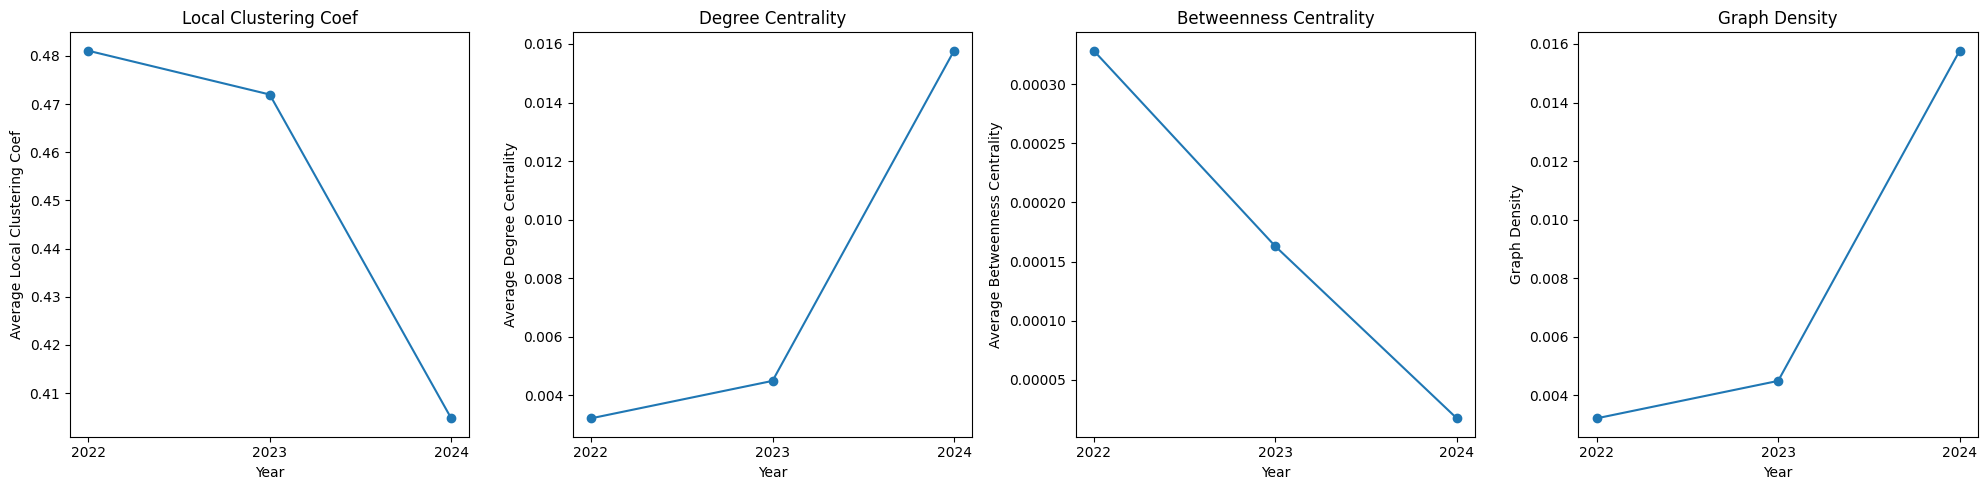

In [10]:
ga.plot_network_statistics(graph_stat_df_final)

Add the explanation of graph statistics here for workflow

In [11]:
boardex_graph_stats_df = ga.create_company_level_statistics(boardex_data, boardex_gvkey_df, graph_stat_df_final)

In [12]:
boardex_graph_stats_df.head()

,permco,gvkey,companyid,score,preferred,duplicate,boardid,boardname,year,local_clustering_coef,degree_centrality,betweenness_centrality,graph_density
0,216,1602,2068.0,1.0,1.0,0.0,2068.0,AMGEN INC,2022,0.428352,0.001668,9.543488e-04,0.003216
1,216,1602,2068.0,1.0,1.0,0.0,2068.0,AMGEN INC,2023,0.156650,0.002396,1.115499e-03,0.004495
2,682,18738,28834.0,1.0,1.0,0.0,28834.0,DOMINARI HOLDINGS INC (AIkido Pharma Inc prior...,2022,0.000000,0.000852,6.180685e-07,0.003216
3,682,18738,28834.0,1.0,1.0,0.0,28834.0,DOMINARI HOLDINGS INC (AIkido Pharma Inc prior...,2023,0.000000,0.000945,0.000000e+00,0.004495
4,887,12713,2179515.0,6.0,1.0,1.0,2179515.0,ABEONA THERAPEUTICS INC (PlasmaTech Biopharmac...,2022,0.000000,0.000591,0.000000e+00,0.003216


We have overall 615 companies, so can be useful

Above error is due to the incorrect company matches

Get this and run by every company to get the stock id

Link everything back to GVKEY to match with Compustat data

In [13]:
boardex_graph_stats_df.drop_duplicates(["gvkey", "year"]).shape

(1402, 13)

In [14]:
# boardex_graph_stats_df.to_csv("final_data/boardex_graph_stats_gvkey.csv")

Next we visualise the graph data structure, and sentiments over time

(Maybe reuse some of the structures above)

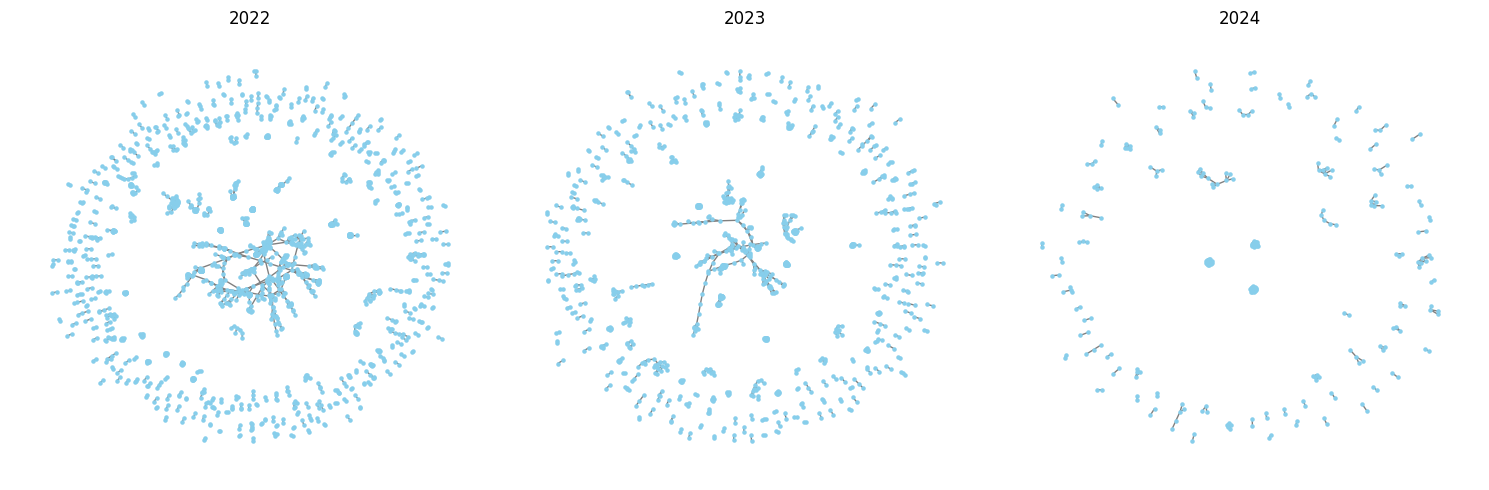

In [15]:
ga.plot_graphs_from_dict(boardex_interlock_adj_dict)

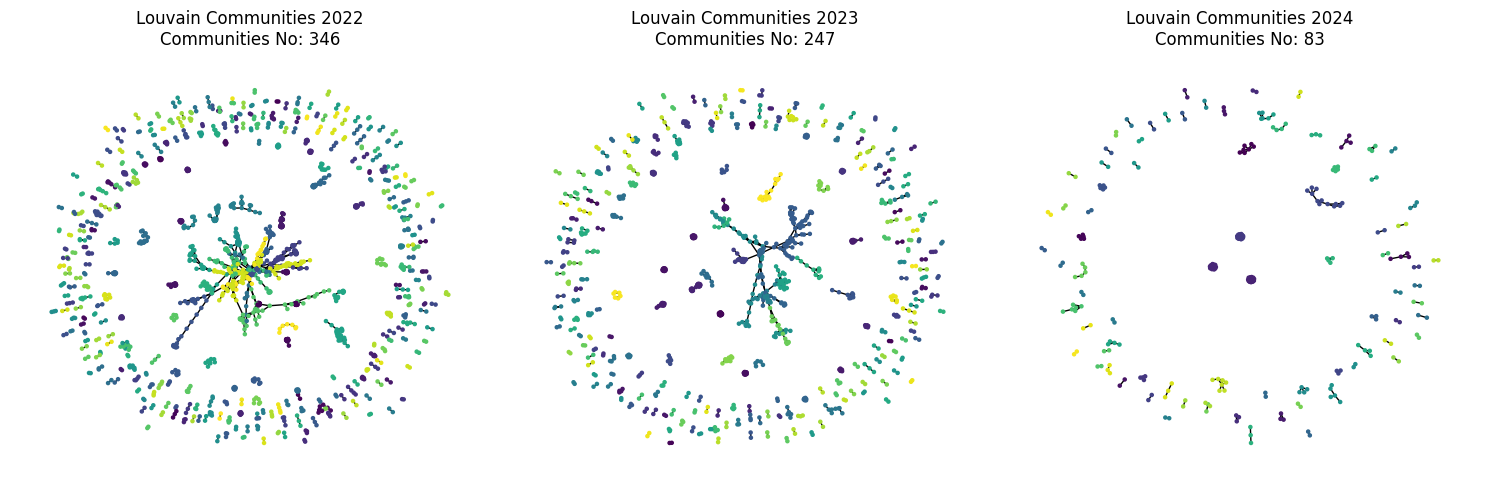

In [16]:
ga.plot_louvain_communities_from_dict(boardex_interlock_adj_dict)

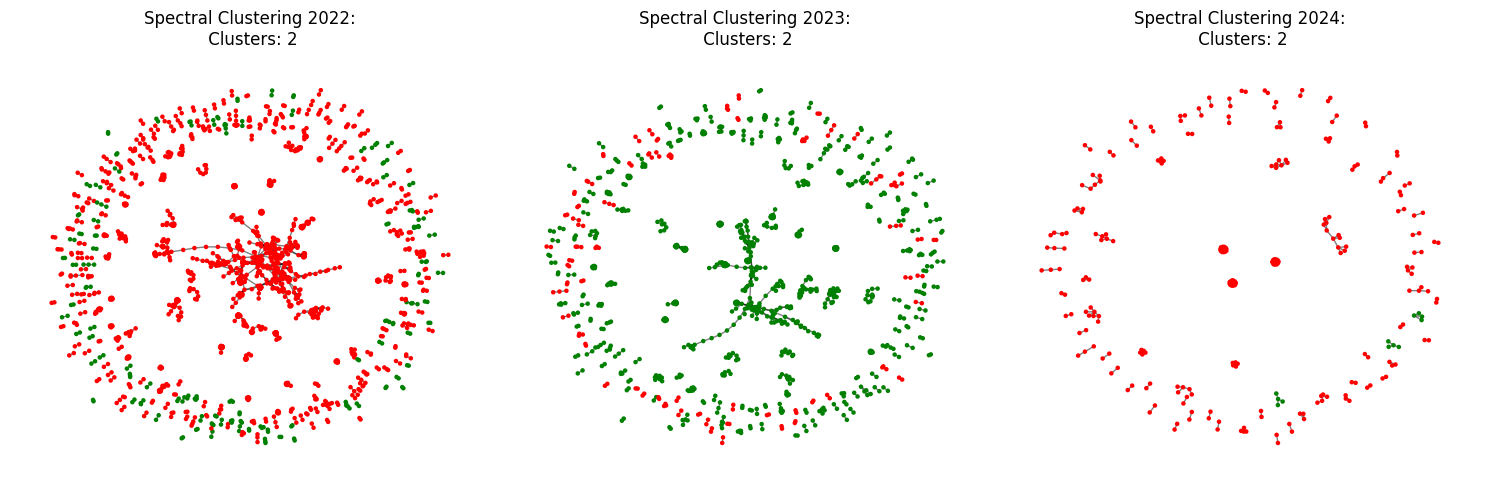

In [17]:
# visualise the graph densities in the above, for overview of content
ga.plot_spectral_clustering_from_dict(boardex_interlock_adj_dict, n_clusters=2, colour_map = ['red', 'green', 'blue', "orange", "yellow"])

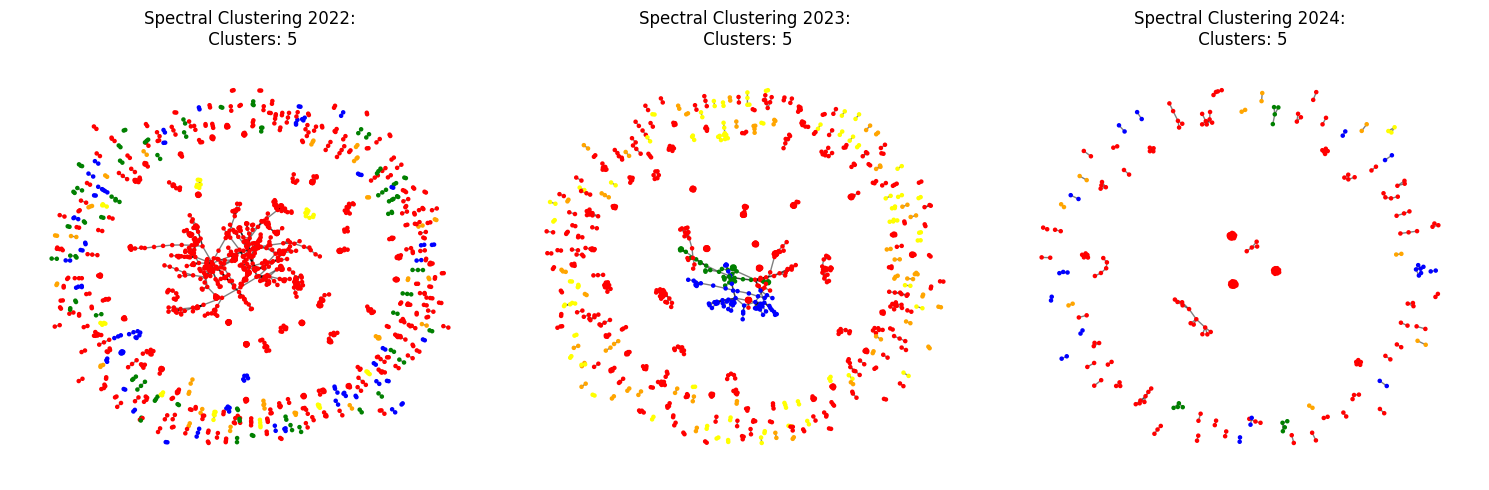

In [18]:
ga.plot_spectral_clustering_from_dict(boardex_interlock_adj_dict, n_clusters=5, colour_map = ['red', 'green', 'blue', "orange", "yellow"])

### 3. Analysis of Text - Annual Report for Decisioning

Average sentiment over time, and look at the graphs over time

#### Add topic details

Relevant topic changes over time, changes in relevant topics, most prominent topics - count these over time, and changes, over the few years, review give the topic structure

Add relevant functions for this, and do the relevant write up.

**Important: think of how to justify 4 topics later for details**

#### LDA Analysis

First we analyse the information content of the annual report and business overview text by 

**State that text from the initial code - which notebook this comes from**

In [19]:
import text_analysis as ta
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bingfeng93/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bingfeng93/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
sec_10k_df = pd.read_json("raw_data/all_companies_report_annual_report_text_2022_2024.json")

In [21]:
sec_10k_df.head()[["companyName","periodOfReport","Text_1", "Text_1A"]]

,companyName,periodOfReport,Text_1,Text_1A
0,AMGEN INC,2023-12-31,Item 1. BUSINESS ##TABLE_END\n\nAmgen Inc. (i...,Item 1A. RISK FACTORS ##TABLE_END\n\nThis rep...
1,AMGEN INC,2022-12-31,Item 1. BUSINESS ##TABLE_END\n\nAmgen Inc. (i...,Item 1A. RISK FACTORS ##TABLE_END\n\nThis rep...
2,AMGEN INC,2021-12-31,Item 1. BUSINESS ##TABLE_END\n\nAmgen Inc. (i...,Item 1A. RISK FACTORS ##TABLE_END\n\nThis rep...
3,BALCHEM CORP,2023-12-31,"Item 1. Business (All amounts in thousands, e...",Item 1A. Risk Factors \n\nWe discuss our expe...
4,BALCHEM CORP,2022-12-31,"Item 1. Business (All amounts in thousands, e...",Item 1A. Risk Factors \n\nWe discuss our expe...


Do topic modelling on risk assessment, hence show the results below

In [22]:
# take 6 minutes to run so skip this section
# sec_10k_df = ta.clean_tokenise_risk_assessment_txt(sec_10k_df)

Pretend the files are already run, and just take the saved file, with the cleaned text already in the `Text_1A_data_cleaned` column. And get the dictionary and corpus

In [23]:
docs_tok = pd.read_json("processed_data/all_companies_metadata_2022_2024_text_1A_cleaned.json")["Text_1A_data_cleaned"]
common_dictionary = Dictionary(docs_tok)
common_corpus = [common_dictionary.doc2bow(text) for text in docs_tok]

Select optimal model based on coherence score, however, it takes a long time to run. However we obtained 4 topics as our optimal model, which we use below

In [24]:
# optimal_la_model, optimal_num_topics = ta.select_optimal_LDA_topic_number(docs_tok, common_corpus, common_dictionary, min_topics = 2, max_topics = 8)
# optimal_la_model.save("lda_mode.gensim")

In [25]:
optimal_num_topics = 4
lda_model = LdaMulticore.load("lda_model/risk_lda_model.gensim")

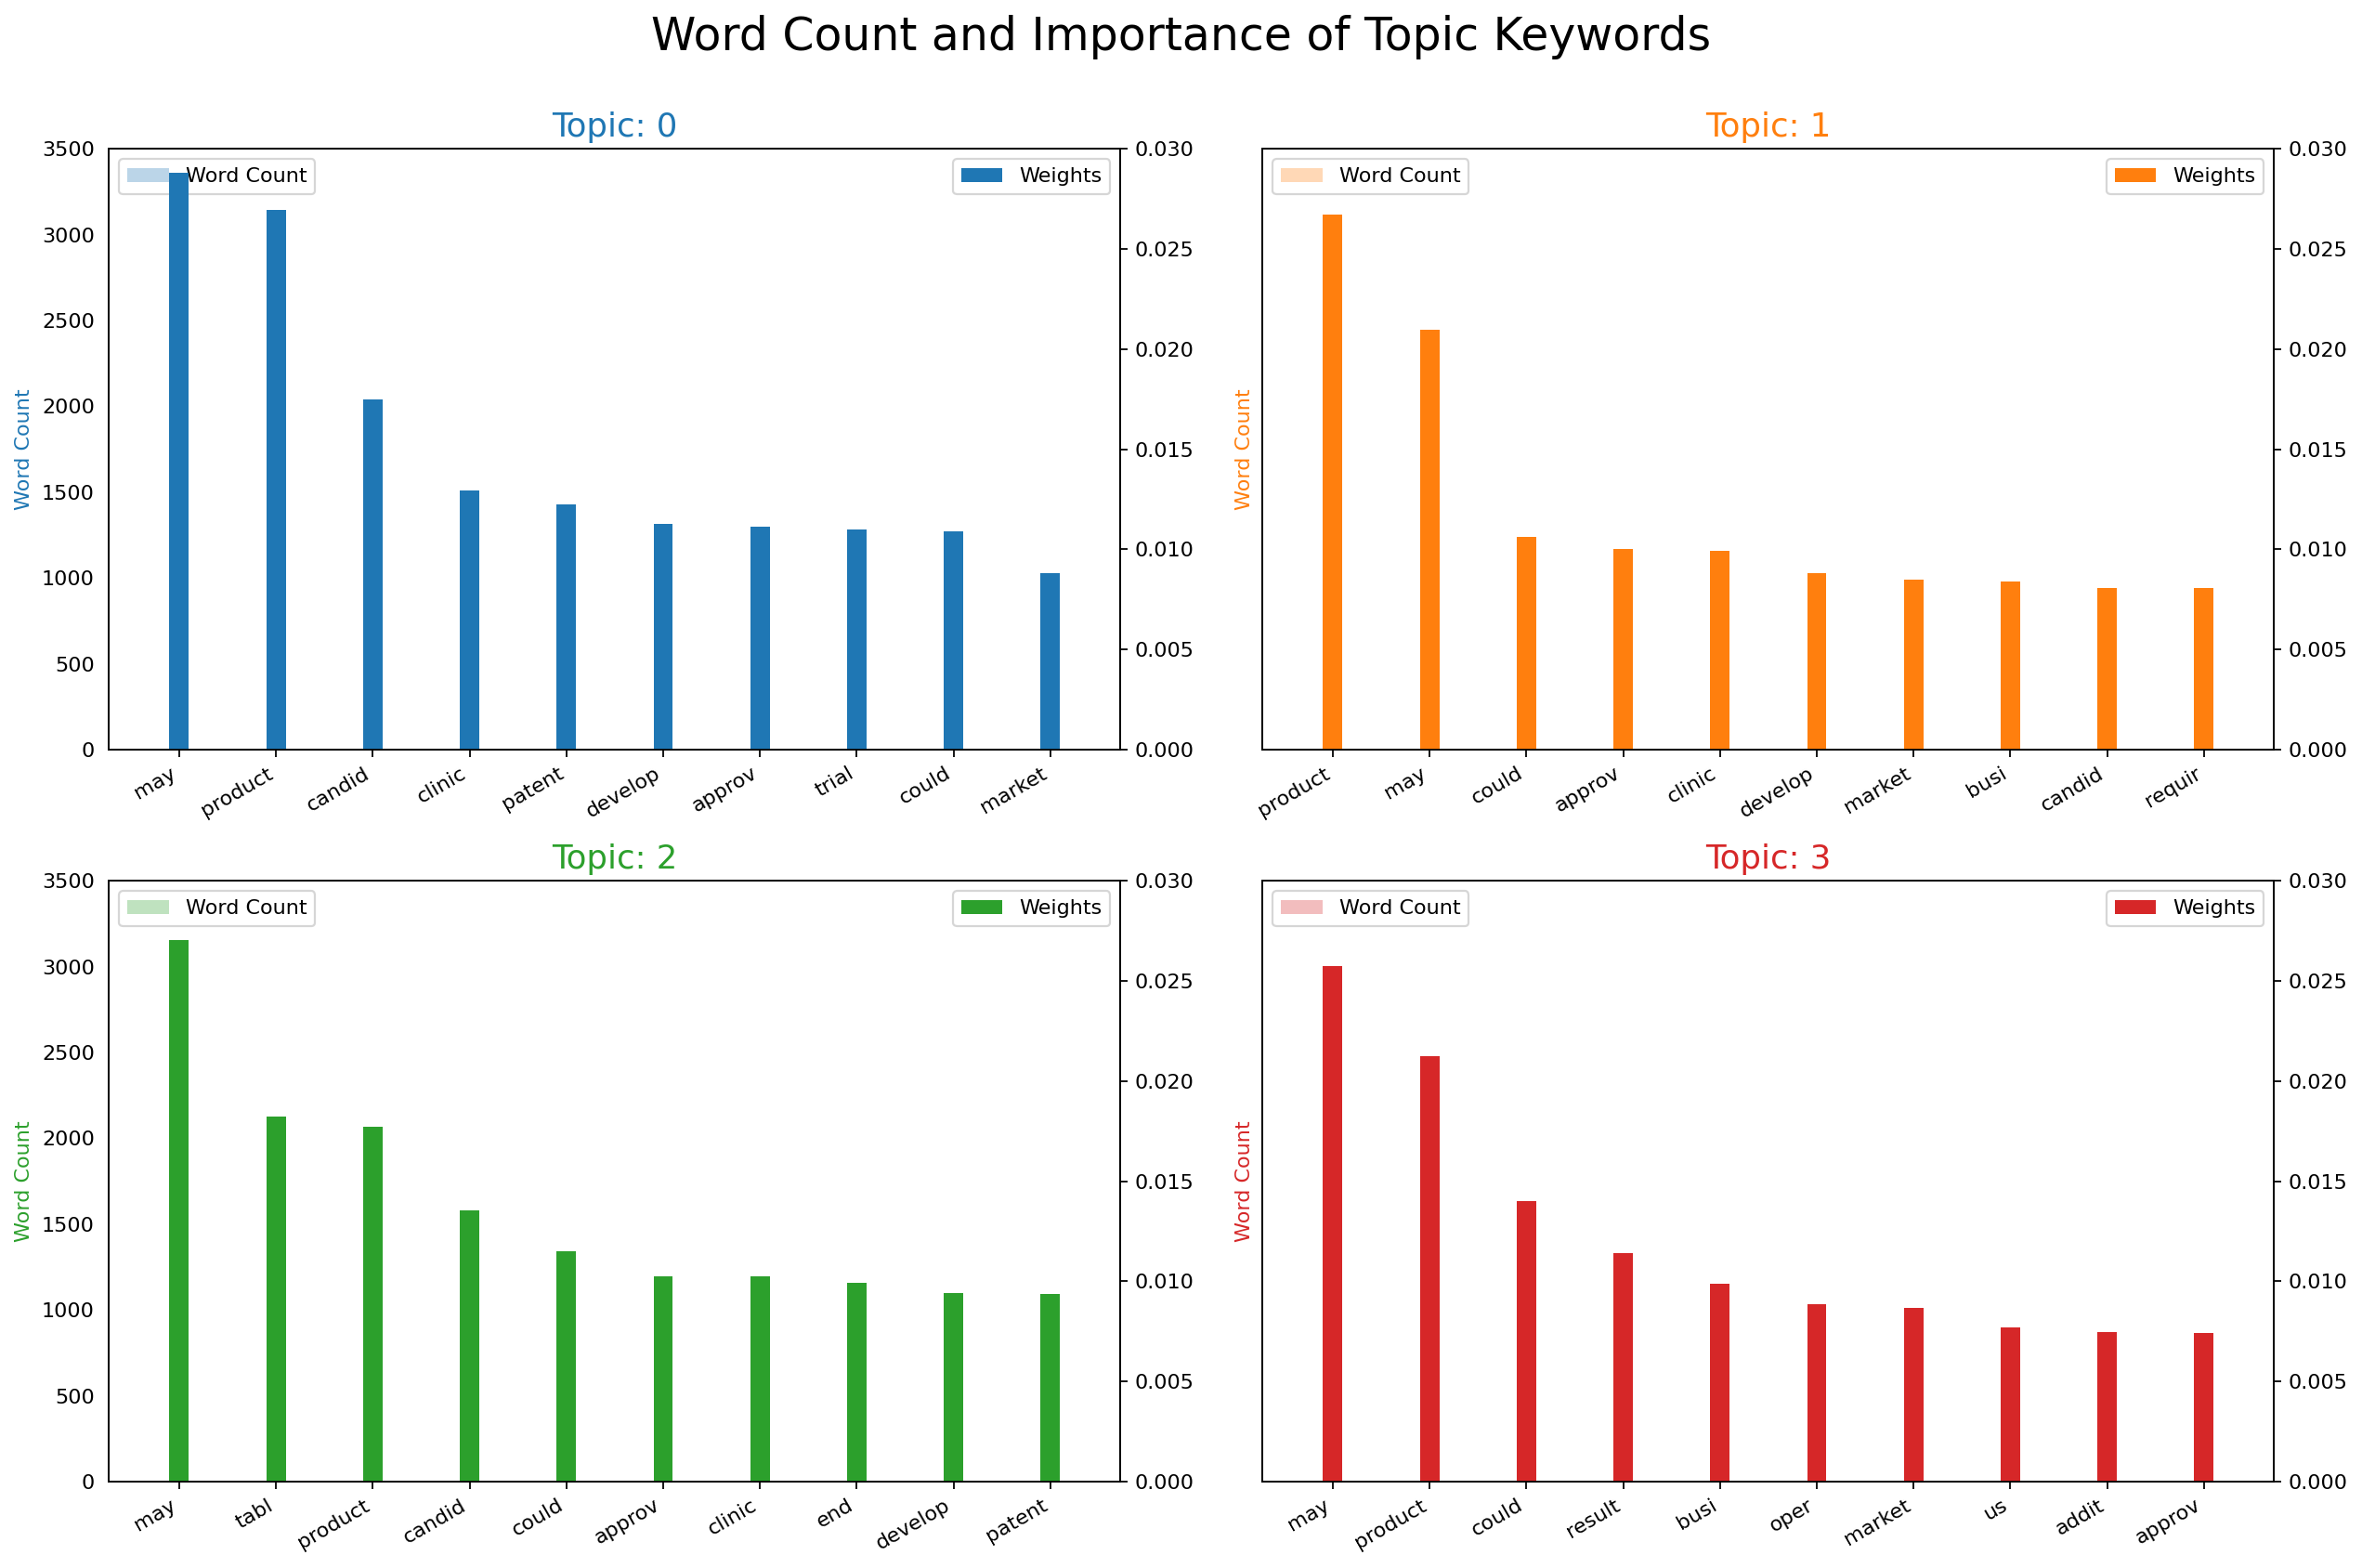

In [26]:
ta.plot_topic_compositions(lda_model, common_dictionary)

Add interpretations of the topics here over time

Then we evaluate the dominant topics here

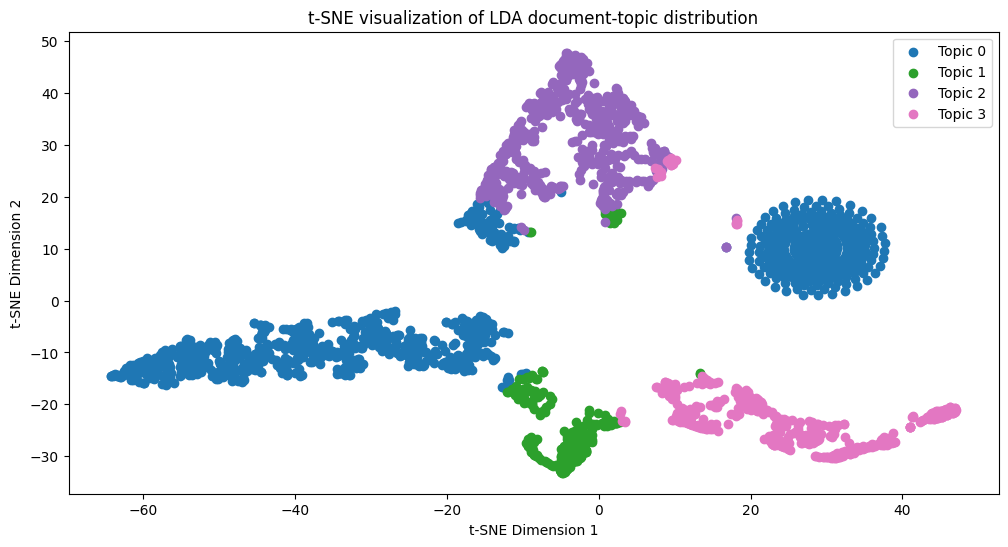

In [27]:
ta.plot_dominant_topic_distributions(lda_model, common_corpus)

In [28]:
sec_10k_df["topic_distribution"] = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in common_corpus] # add topic distribtuion to dataframe

Next we evaluate the sentiments of the text over time. However, this takes tiem, so we load in the processed data here instead.

In [29]:
# # we run the following code to get the sentiments
# sec_10k_df = ta.get_report_sentiments(sec_10k_df)

In [30]:
sec_10k_df = pd.read_json("processed_data/all_companies_report_annual_report_text_2022_2024_with_sentiments_topics.json")
sec_10k_df["report_year"] = pd.to_datetime(sec_10k_df["periodOfReport"]).apply(lambda x : x.year)

In [31]:
sec_10k_df.columns

Index(['id', 'accessionNo', 'cik', 'ticker', 'companyName', 'companyNameLong',
       'formType', 'description', 'filedAt', 'linkToTxt', 'linkToHtml',
       'linkToXbrl', 'linkToFilingDetails', 'entities', 'documentFormatFiles',
       'dataFiles', 'seriesAndClassesContractsInformation', 'periodOfReport',
       'Text_1', 'Text_1A', 'effectivenessDate', 'topic_distribution',
       'risk_sentiment', 'business_overview_sentiment', 'report_year'],
      dtype='object')

In [32]:
sec_10k_df[["cik", "report_year", 
                           "risk_sentiment", "business_overview_sentiment",
                           #"risk_topic_allocation" # review this separately for risk topic allocation later
                           ]].head()

,cik,report_year,risk_sentiment,business_overview_sentiment
0,318154,2023,0,-1
1,318154,2022,-1,-1
2,318154,2021,0,1
3,9326,2023,-1,-1
4,9326,2022,-1,-1


Describe sentiment here and the details of everything, sentiment and overview of approach, and also discuss sentiment of the models here as well.

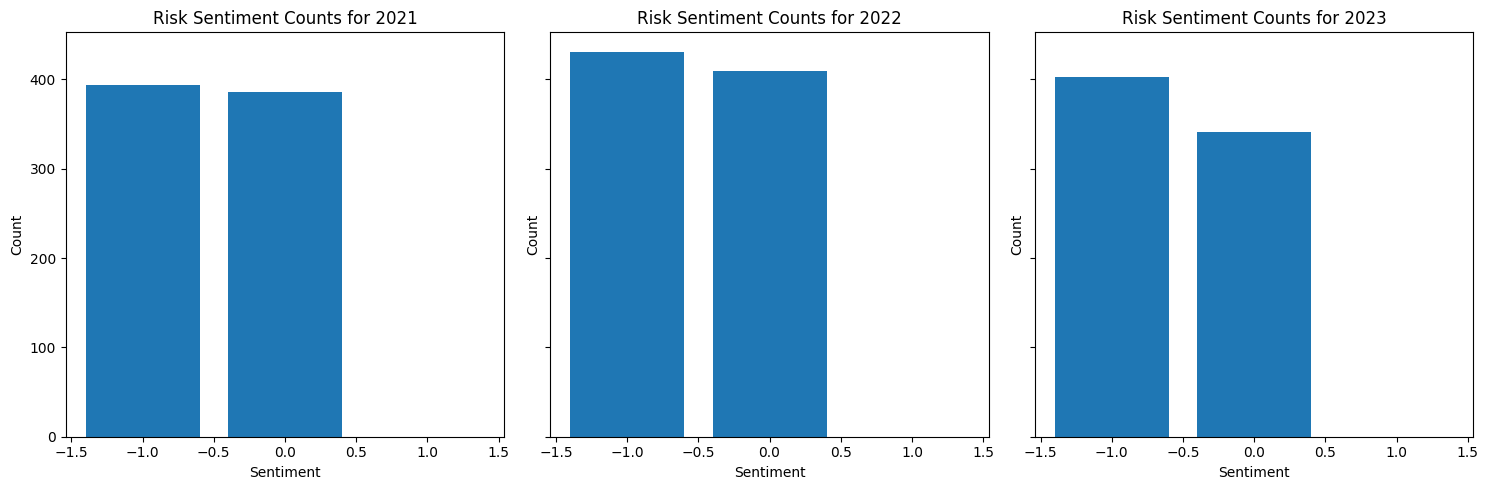

In [33]:
ta.plot_annual_report_sentiments(sec_10k_df, 'risk_sentiment', [2021, 2022, 2023] )

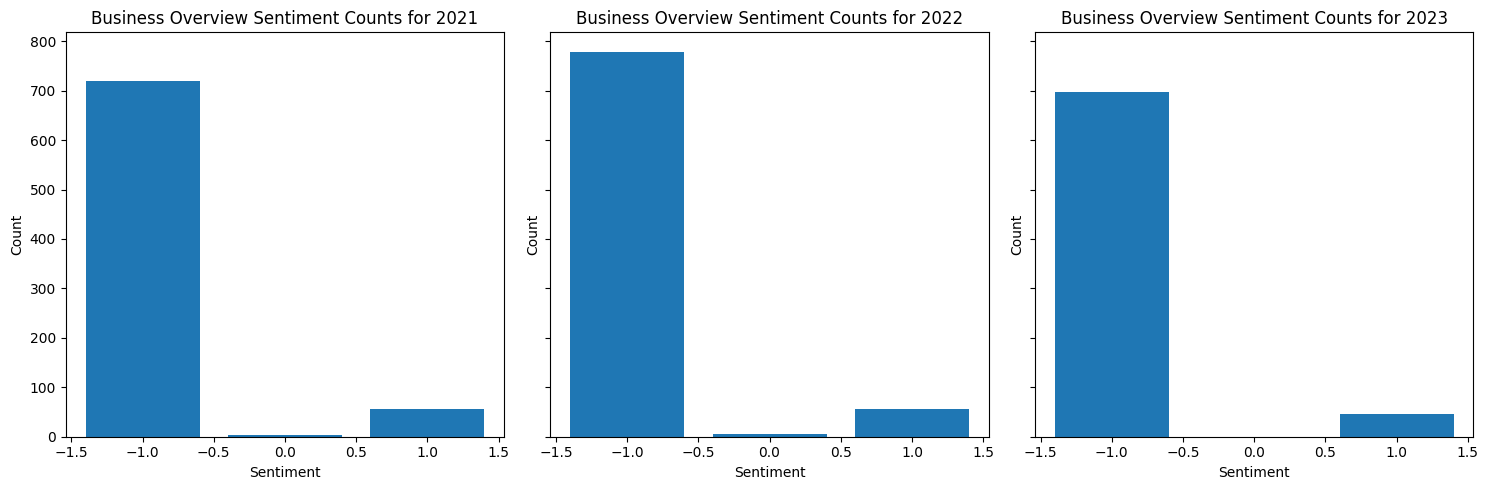

In [34]:
ta.plot_annual_report_sentiments(sec_10k_df, 'business_overview_sentiment', [2021, 2022, 2023] )

### 4. Combining the datasets together

Here we combine the information from the graph statistics, annual report text topic distributions and sentiments and financial data on pharmaceutical companies into a single table/dataframe to run panel regression.

In [35]:
# put the processing of the regression data into a single function here 
# makes it straight forward and then add regression commands for next steps
import regression_analysis as ra

In [36]:
# get the annual report compustat keys # first step
ar_key_df = pd.read_csv("raw_data/sec_gvkey_cik_us_pharma_2022_2024.csv", index_col = 0)
ar_key_df.head()

,gvkey,conm,datadate1,datadate2,cik,source,coname,fndate,lndate,n10k,n10k_nt,n10k_a,n10q,n10q_nt,n10q_a,ndef,n8k,ntot,flag
0,1602,AMGEN INC,1983-03-31,2023-12-31,318154.0,COMPN,AMGEN INC,1994-03-28,2024-06-04,32.0,0.0,3.0,95.0,0.0,4.0,92.0,308.0,2936.0,3.0
1,1979,BALCHEM CORP -CL B,1974-12-31,2023-12-31,9326.0,COMPN,BALCHEM CORP,1995-08-11,2024-05-24,31.0,0.0,2.0,91.0,0.0,5.0,38.0,194.0,1148.0,3.0
2,2086,BAXTER INTERNATIONAL INC,1950-12-31,2023-12-31,10456.0,COMPN,BAXTER INTERNATIONAL INC,1994-03-21,2024-06-05,34.0,1.0,3.0,97.0,1.0,5.0,52.0,276.0,2321.0,3.0
3,2403,BRISTOL-MYERS SQUIBB CO,1950-12-31,2023-12-31,14272.0,COMPN,BRISTOL MYERS SQUIBB CO,1994-03-15,2024-05-09,33.0,0.0,3.0,98.0,1.0,6.0,64.0,373.0,3304.0,3.0
4,2990,IMUNON INC,1983-09-30,2023-12-31,749647.0,COMPN,"IMUNON, INC.",1996-08-07,2024-05-22,38.0,1.0,9.0,96.0,3.0,9.0,41.0,300.0,1263.0,3.0


Next we load the compustat data (perhaps show what data is here)

In [37]:
# load the compustat data # second step - two functions is fine!!
compustat_data_df = pd.read_csv("raw_data/compustat_pharma_2021_2024_manual.csv", low_memory=False)

In [38]:
# use this final data to load everything so it is fine!! final merged data is everything
final_merged_data_df = ra.get_combined_financial_graph_ar_dataset(ar_key_df, sec_10k_df, 
                                                boardex_graph_stats_df, compustat_data_df)

final_merged_data_df.shape

(1136, 991)

### 5. Regression model of Governance structures and Decisioning on Company Performance

Here we will use stata, moreover we assume that Stata is the Standard Edition and installed in `/usr/local/stata18` folder. Otherwise this can be edited in the `regression_analysis.py` file and documentation can found on the [Stata python docs](https://www.stata.com/python/pystata18/stata.html#pystata.stata.run)

**Maybe filter out the most relevant variables above before passing to this section here**

Describe here the naive model.

Do some basic EDA structure (correlation effects of relevant effects)

And analyse the structure here, and statistical output for the workflow here.

Convert the Stata commands here and that's it!! Put it in the same notebook!!

In [39]:
import stata_setup
stata_setup.config("/usr/local/stata18", "se", splash=False)
from pystata import stata

In [40]:
ra.run_regression_preprocess(final_merged_data_df, stata)



. 
.     sum epsfi sale rdipa local_clustering_coef degree_centrality betweenness_
> centrality graph_density risk_sentiment business_overview_sentiment risktopic
> 2 risktopic3 risktopic4

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       epsfi |        949   -2.697165    10.46169    -203.57      38.22
        sale |        949    1175.087    7507.122      -.418     100330
       rdipa |        943   -19.89276    170.6761    -3692.6          1
local_clus~f |        949    .3124124    .3416863          0          1
degree_cen~y |        949    .0029435    .0029682   .0005907   .0223889
-------------+---------------------------------------------------------
betweennes~y |        949    .0008185    .0030338          0   .0386694
graph_dens~y |        949    .0037574    .0006324   .0032155   .0044947
risk_senti~t |        949   -.5142255    .5000611         -1          0
business_o~t |  

In [41]:
stata.run("xtreg epsfi sale local_clustering_coef degree_centrality betweenness_centrality graph_density risk_sentiment business_overview_sentiment risktopic1 risktopic2 risktopic3 , re")


Random-effects GLS regression                   Number of obs     =        949
Group variable: gvkey                           Number of groups  =        557

R-squared:                                      Obs per group:
     Within  = 0.0363                                         min =          1
     Between = 0.0236                                         avg =        1.7
     Overall = 0.0327                                         max =          2

                                                Wald chi2(10)     =      28.44
corr(u_i, X) = 0 (assumed)                      Prob > chi2       =     0.0015

------------------------------------------------------------------------------
       epsfi | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        sale |   .0001764   .0000684     2.58   0.010     .0000425    .0003104
local_clus~f |   .3180965   1.085348     0.29   0.769    -1.8091

In [42]:
stata.run("xtreg rdipa sale local_clustering_coef degree_centrality betweenness_centrality graph_density risk_sentiment business_overview_sentiment risktopic1 risktopic2 risktopic3 , re")


Random-effects GLS regression                   Number of obs     =        943
Group variable: gvkey                           Number of groups  =        557

R-squared:                                      Obs per group:
     Within  = 0.0010                                         min =          1
     Between = 0.4742                                         avg =        1.7
     Overall = 0.3535                                         max =          2

                                                Wald chi2(10)     =     509.72
corr(u_i, X) = 0 (assumed)                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
       rdipa | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        sale |  -.0132563   .0006193   -21.41   0.000    -.0144701   -.0120426
local_clus~f |   8.591799   15.93386     0.54   0.590    -22.637

### 6. Conclusion and Next steps

Use README section and discuss Bayesian workflow here. Seen here features are meaningful particular on sentiment, therefore use regression to do topic modelling here.

1. Meaningful graph cluster - from EDA structure
2. Topic modelling from the regression
3. Add more data to enrich the details, given the limited interpretation, - describe features missing and add this here.
    - Add more years as needed for the workflow

Bayesian enrichment of topics - given the structure we have.